# Machine Learning
## Regression Problem
###### Por: Ricardo Reis

###### Case - California Housing


#### Carrega Pacotes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

# Para calcular VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Para padronização dos dados
from sklearn.preprocessing import StandardScaler

# Para separação em amostra de treino e teste
from sklearn.model_selection import train_test_split

# Cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Métrica de erro
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Leitura de Dados

In [0]:
df = pd.read_csv('/content/housing.csv', sep = ',' )

In [3]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### Análise Exploratória

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [0]:
#Checa Valores Nulos
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [0]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

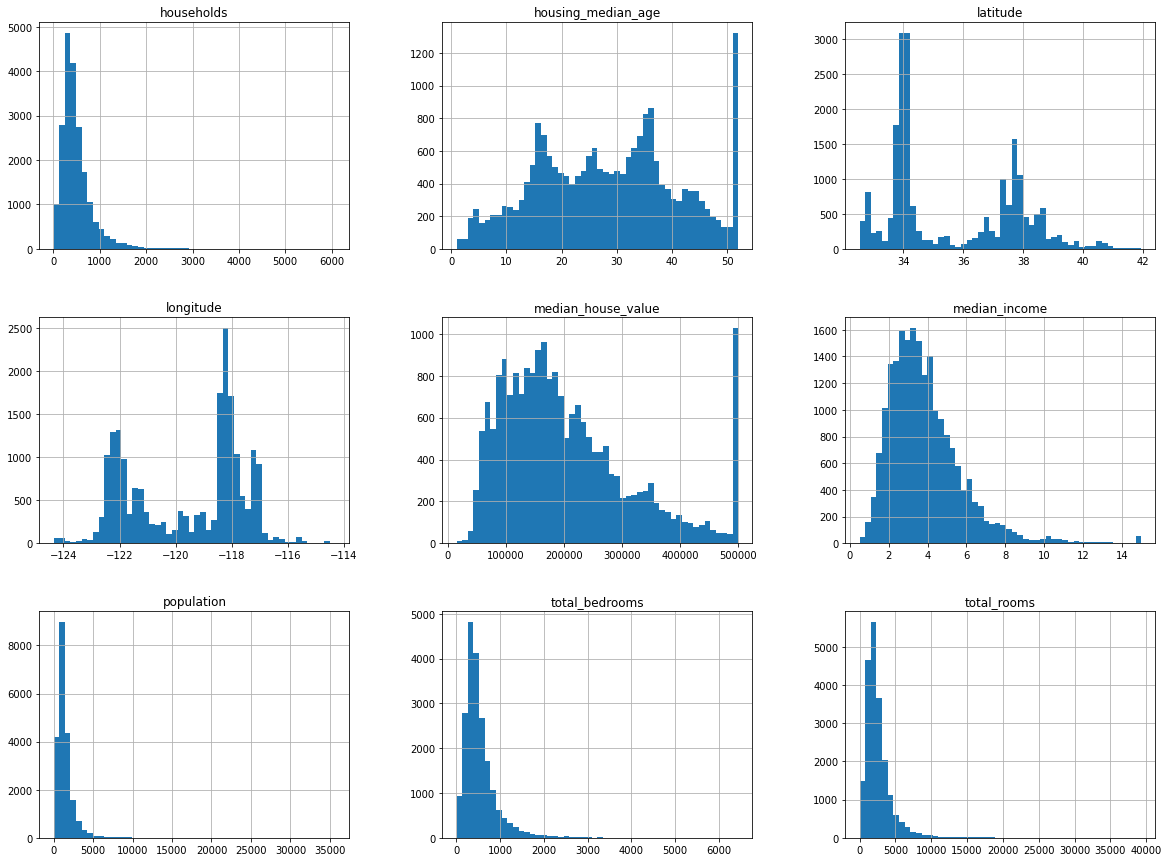

In [0]:
df.hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f46209495f8>,
      dtype=object)

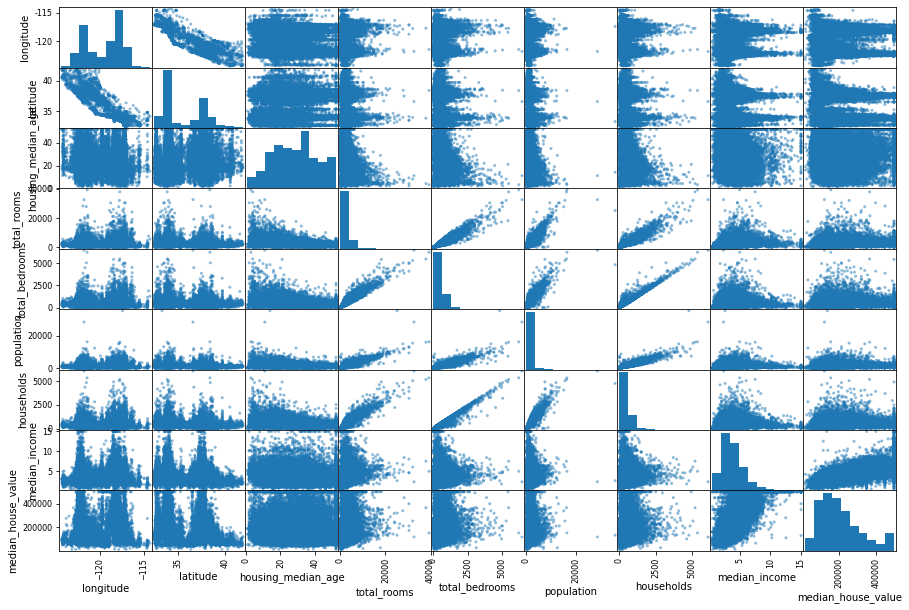

In [0]:
 pd.plotting.scatter_matrix(df, figsize=(15, 10))

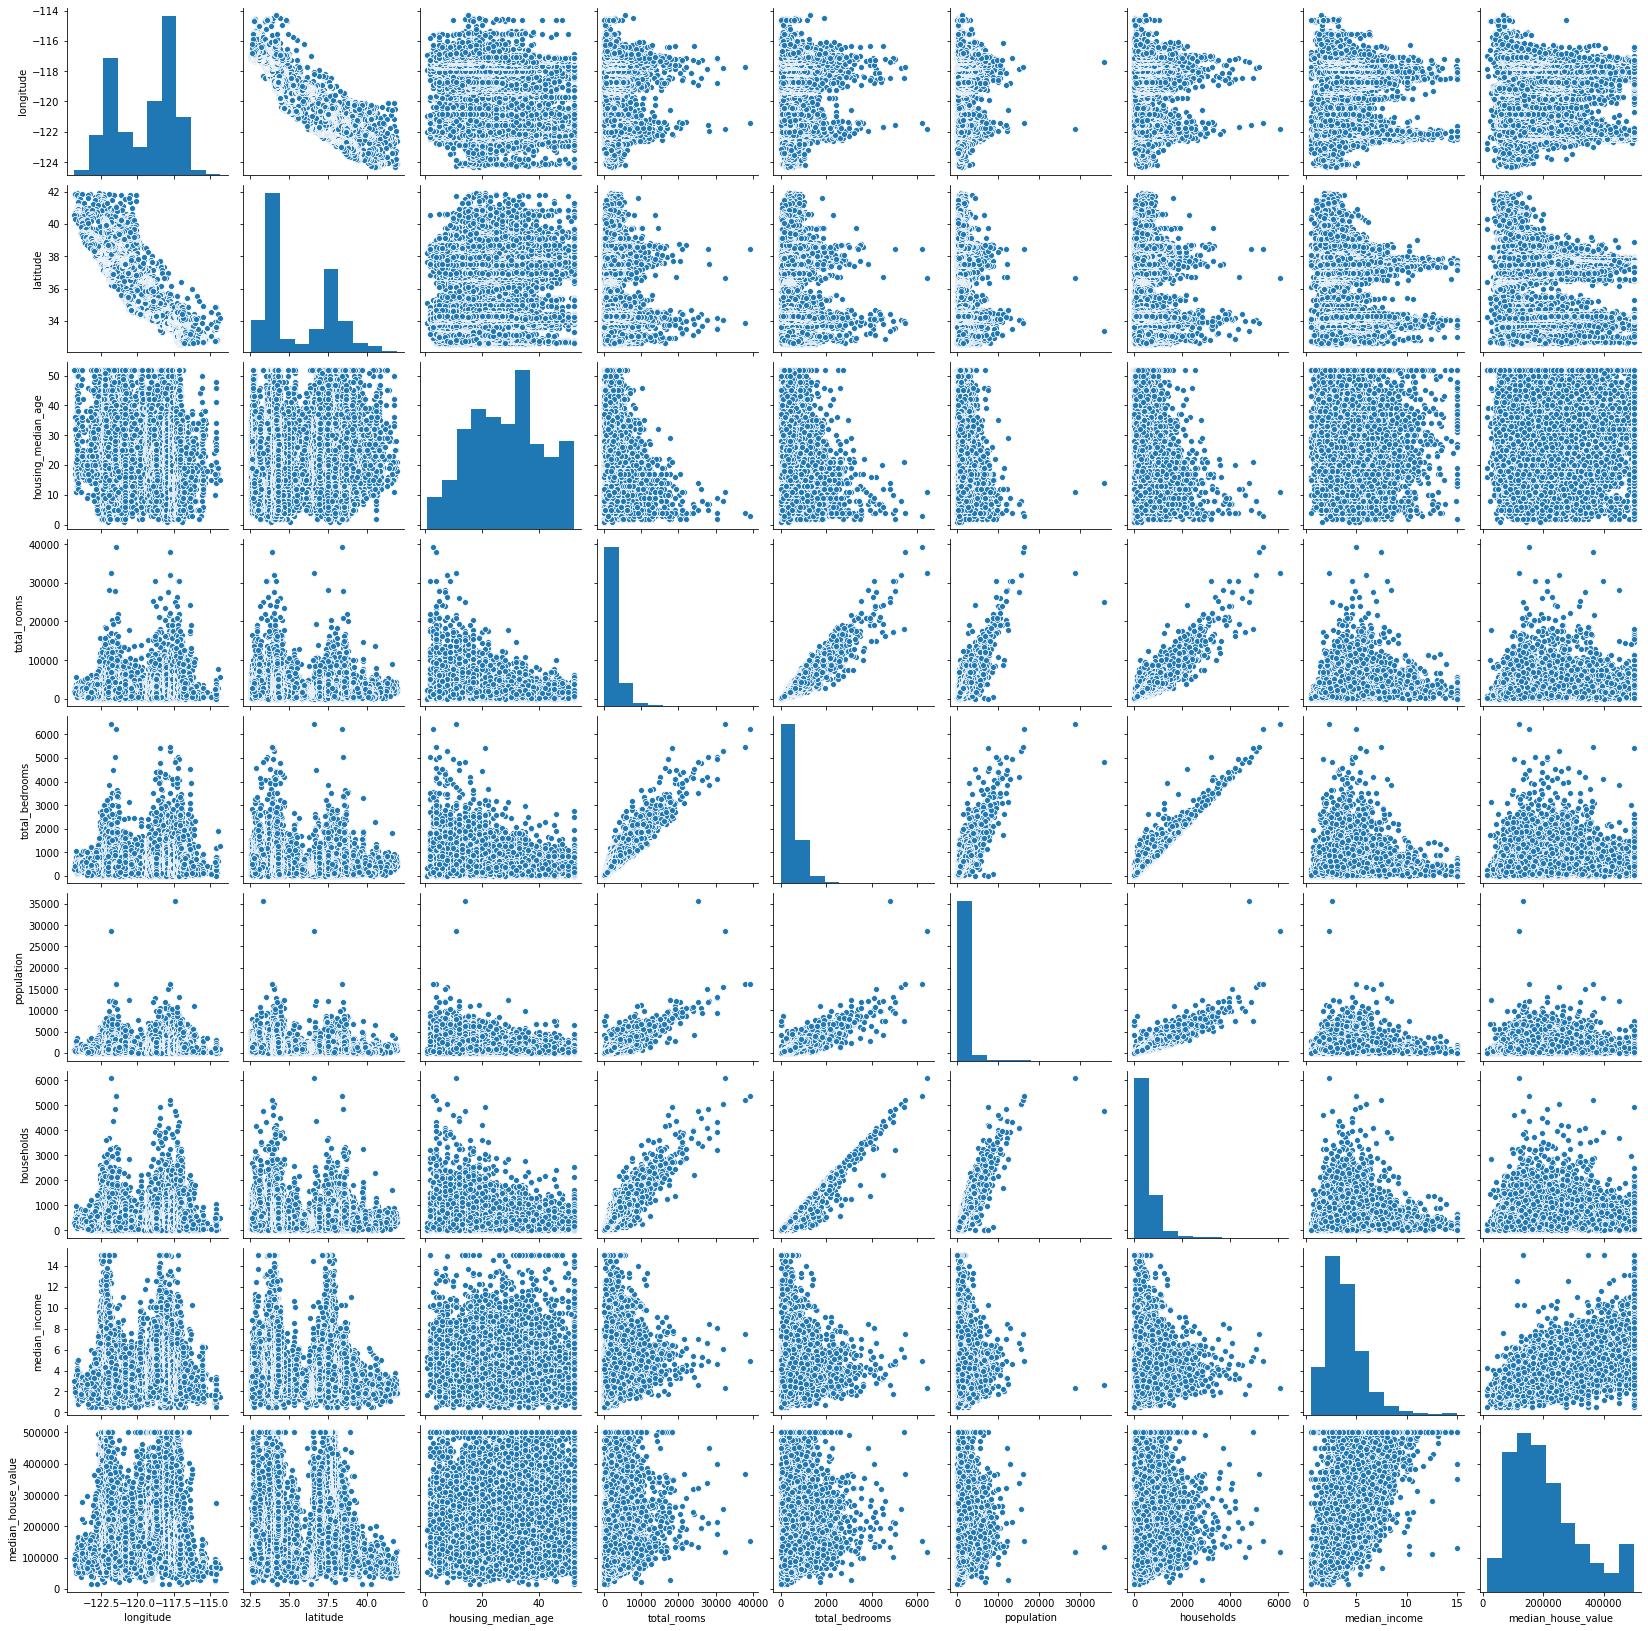

In [0]:
sns.pairplot(df)

In [0]:
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

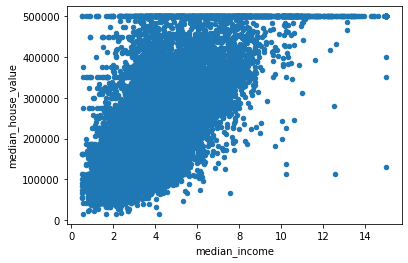

In [0]:
df.plot(kind='scatter', x = 'median_income', y = 'median_house_value')

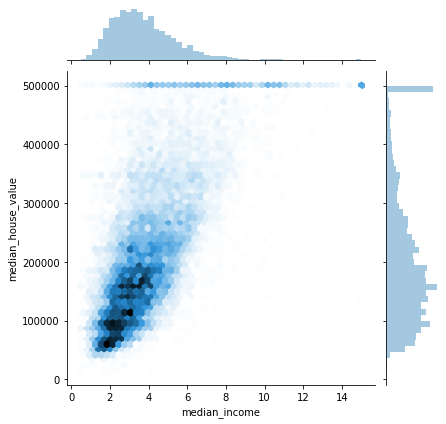

In [0]:
sns.jointplot(data=df, x = 'median_income', y = 'median_house_value', kind = 'hex')

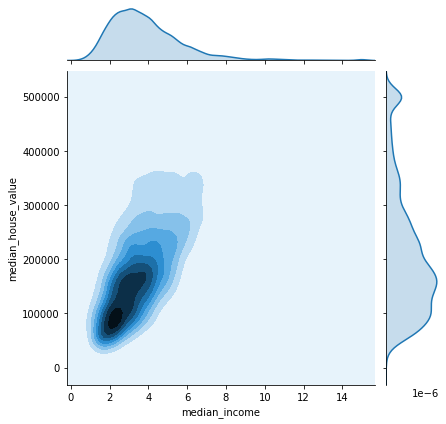

In [0]:
sns.jointplot(data=df, x = 'median_income', y = 'median_house_value', kind = 'kde')

#### Data Prep

In [0]:
#Separa Features da Variável Resposta
features = df.loc[:,['longitude',	'latitude',	'housing_median_age',	'total_rooms', 'total_bedrooms',	'population',	'households',	'median_income']]
labels = df.loc[:,['median_house_value']]
         

In [0]:
#Substituindo valores NA/NaN pela mediana
median = features["total_bedrooms"].median()
features["total_bedrooms"] = features["total_bedrooms"].fillna(median) 

In [0]:
# Compute and view VIF
X = features[['housing_median_age', 'total_rooms',
         'median_income']]


vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

            variables       VIF
0  housing_median_age  2.790673
1         total_rooms  2.266877
2       median_income  3.946976


In [6]:
dummy = pd.get_dummies(df["ocean_proximity"])
dummy

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [7]:
features = pd.concat([features, dummy], axis = 1)
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0


In [8]:
sc = StandardScaler()
features2 = sc.fit_transform(features)
features2

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.32284391,  1.04318455, -0.60701891, ..., -0.01556621,
         2.83074203, -0.38446649],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.01556621,
         2.83074203, -0.38446649],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.01556621,
        -0.35326426, -0.38446649],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.01556621,
        -0.35326426, -0.38446649]])

In [0]:
#Cria Dataframes de Treino e Teste (Hold Out Validation)
X_train, X_test, y_train, y_test = train_test_split(features2, labels, test_size = 0.3, random_state = 12345)

#### Treinando o Modelo

##### Linear Regression

###### Hold-Out

In [0]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Valor do intercepto
lin_reg.intercept_

array([206519.76066743])

In [0]:
# Valores dos coeficientes
lin_reg.coef_

array([[-51409.26386207, -52694.71376088,  13159.57062023,
         -9670.0931273 ,  23136.00057785, -49930.3067009 ,
         40420.56196927,  73292.9588922 ,   6523.80508663,
        -13147.03890499,   2028.73452065,   2861.8346482 ,
          5817.77716073]])

In [0]:
y_pred = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68165.25401535761

###### K-fold

In [0]:
lin_reg_kfold = LinearRegression()
lin_scores = cross_val_score(lin_reg_kfold, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print("Scores:", lin_rmse_scores)
print("Mean:", lin_rmse_scores.mean())
print("Standard deviation:", lin_rmse_scores.std())

Scores: [69932.04803992 67990.87677929 73382.57935849 65988.3012812
 65264.19657524 66863.72495146 68372.74507095 69626.38443708
 67030.451642   68258.01672891]
Mean: 68270.93248645362
Standard deviation: 2204.1856606481947


##### Regression Tree com Grid Search

In [10]:
params = {
    "max_depth" : [2,3,4,5,6,7,8,9,10,11,12,13,14],
    "max_leaf_nodes" : [100,200,250,270],
}

tree_reg = DecisionTreeRegressor()
model_tree_gs = GridSearchCV(tree_reg, param_grid=params, verbose=False)
model_tree_gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14],
                         'max

In [11]:
model_tree_gs.best_params_

{'max_depth': 12, 'max_leaf_nodes': 250}

In [12]:
y_pred = model_tree_gs.best_estimator_.predict(X_train)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

49087.28135935765

##### Test Set

In [13]:
y_test_pred = model_tree_gs.best_estimator_.predict(X_test)
lin_mse = mean_squared_error(y_test, y_test_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

62238.03708266331